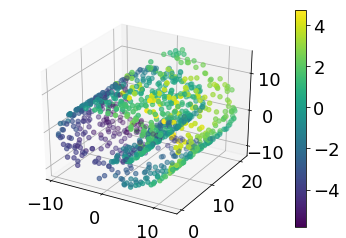

1/300 ... likelihood: -4310.486141925008
2/300 ... likelihood: -4246.147786725234
3/300 ... likelihood: -4244.70822064252
4/300 ... likelihood: -4243.357272518803
5/300 ... likelihood: -4241.979095287474
6/300 ... likelihood: -4240.492575095566
7/300 ... likelihood: -4238.812480067719
8/300 ... likelihood: -4236.830360729249
9/300 ... likelihood: -4234.395855960534
10/300 ... likelihood: -4231.294126689949
11/300 ... likelihood: -4227.216550744228
12/300 ... likelihood: -4221.723191013278
13/300 ... likelihood: -4214.19952096962
14/300 ... likelihood: -4203.821511632046
15/300 ... likelihood: -4189.568615396972
16/300 ... likelihood: -4170.3579110591
17/300 ... likelihood: -4145.375416656361
18/300 ... likelihood: -4114.592937491
19/300 ... likelihood: -4079.293641888482
20/300 ... likelihood: -4042.290579258729
21/300 ... likelihood: -4007.380345931302
22/300 ... likelihood: -3977.770388833461
23/300 ... likelihood: -3954.6029028448347
24/300 ... likelihood: -3937.0708201236575
25/300

193/300 ... likelihood: -3372.259580550829
194/300 ... likelihood: -3370.779999832038
195/300 ... likelihood: -3369.4035928001517
196/300 ... likelihood: -3368.1247369665116
197/300 ... likelihood: -3366.9390226251794
198/300 ... likelihood: -3365.843088520422
199/300 ... likelihood: -3364.8341816214324
200/300 ... likelihood: -3363.9096932189386
201/300 ... likelihood: -3363.066786510462
202/300 ... likelihood: -3362.30215330342
203/300 ... likelihood: -3361.611900331924
204/300 ... likelihood: -3360.991549276598
205/300 ... likelihood: -3360.4361259996217
206/300 ... likelihood: -3359.9403091495183
207/300 ... likelihood: -3359.498606408646
208/300 ... likelihood: -3359.1055295140286
209/300 ... likelihood: -3358.7557465543046
210/300 ... likelihood: -3358.444199389981
211/300 ... likelihood: -3358.1661829134728
212/300 ... likelihood: -3357.91738918027
213/300 ... likelihood: -3357.693922898918
214/300 ... likelihood: -3357.4922958199268
215/300 ... likelihood: -3357.3094070696643
2

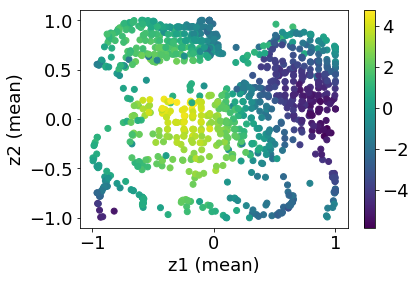

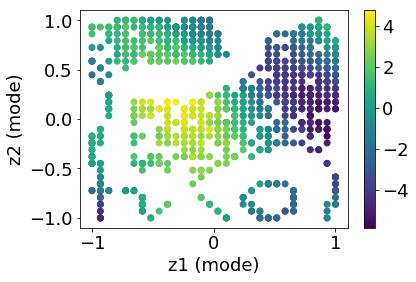

estimated x-mode: [10.77139214  0.43109655  9.68960241]
estimated x-mode on map: [-0.31034483  0.17241379]


In [1]:
# -*- coding: utf-8 -*- 
# %reset -f
"""
@author: Hiromasa Kaneko
"""
%matplotlib inline

# Demonstration of inverse GTM-MLR (Generative Topographic Mapping - Multiple Linear Regression)

import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
from sklearn.datasets.samples_generator import make_swiss_roll
import matplotlib.figure as figure
import mpl_toolkits.mplot3d

from gtm import gtm

target_y_value = 4  # y-target for inverse analysis

# settings
shape_of_map = [30, 30]
shape_of_rbf_centers = [4, 4]
variance_of_rbfs = 0.5
lambda_in_em_algorithm = 0.001
number_of_iterations = 300
display_flag = 1
number_of_samples = 1000
noise_ratio_of_y = 0.1
random_state_number = 30000

# load a swiss roll dataset and make a y-variable
original_X, color = make_swiss_roll(number_of_samples, 0, random_state=10)
X = original_X
raw_y = 0.3 * original_X[:, 0] - 0.1 * original_X[:, 1] + 0.2 * original_X[:, 2]
original_y = raw_y + noise_ratio_of_y * raw_y.std(ddof=1) * np.random.randn(len(raw_y))
# plot
plt.rcParams["font.size"] = 18
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(original_X[:, 0], original_X[:, 1], original_X[:, 2], c=original_y)
fig.colorbar(p)
plt.show()

# autoscaling
autoscaled_X = (original_X - original_X.mean(axis=0)) / original_X.std(axis=0, ddof=1)

# construct GTM model
model = gtm(shape_of_map, shape_of_rbf_centers, variance_of_rbfs, lambda_in_em_algorithm, number_of_iterations,
            display_flag)
model.fit(autoscaled_X)
if model.success_flag:
    # calculate of responsibilities
    responsibilities = model.responsibility(autoscaled_X)

    # plot the mean of responsibilities
    means = responsibilities.dot(model.map_grids)
    plt.figure()
    #    plt.figure(figsize=figure.figaspect(1))
    plt.scatter(means[:, 0], means[:, 1], c=original_y)
    plt.colorbar()
    plt.ylim(-1.1, 1.1)
    plt.xlim(-1.1, 1.1)
    plt.xlabel("z1 (mean)")
    plt.ylabel("z2 (mean)")
    plt.show()

    # plot the mode of responsibilities
    modes = model.map_grids[responsibilities.argmax(axis=1), :]
    plt.figure()
    #    plt.figure(figsize=figure.figaspect(1))
    plt.scatter(modes[:, 0], modes[:, 1], c=original_y)
    plt.colorbar()
    plt.ylim(-1.1, 1.1)
    plt.xlim(-1.1, 1.1)
    plt.xlabel("z1 (mode)")
    plt.ylabel("z2 (mode)")
    plt.show()

# construct MLR model
model.mlr(original_X, original_y)

# inverse analysis
estimated_x_mean, estimated_x_mode, responsibilities_inverse = model.inverse_gtm_mlr(target_y_value)
estimated_x_mean = estimated_x_mean * original_X.std(axis=0, ddof=1) + original_X.mean(axis=0)
estimated_x_mode = estimated_x_mode * original_X.std(axis=0, ddof=1) + original_X.mean(axis=0)
# print("estimated x-mean: {0}".format(estimated_x_mean))
print("estimated x-mode: {0}".format(estimated_x_mode))

estimated_x_mean_on_map = responsibilities_inverse.dot(model.map_grids)
estimated_x_mode_on_map = model.map_grids[np.argmax(responsibilities_inverse), :]
# print("estimated x-mean on map: {0}".format(estimated_x_mean_on_map))
print("estimated x-mode on map: {0}".format(estimated_x_mode_on_map))
